In [4]:
import pandas as pd

# read data
data = pd.read_csv("../datasets/data_clean.csv")

In [5]:
import re

counter = 0

gun_count = {}

# iterate over items in gun_type
for item in data["gun_type"]:
    # split item on |
    item = re.split("[|]+", item)
    # iterate over new elements
    for element in item:
        # remove number and : from element
        element = element.split(':')[-1]
        # record in dictionary how often relationship occurs if not Unknown
        if element in gun_count:
            gun_count[element] += 1
            counter += 1
        elif element != "Unknown":
            gun_count[element] = 1
            counter += 1

In [6]:
# print total and amount for every gun
print("Total:", counter)

for item in gun_count:
    print(item, gun_count[item])

Total: 61226
Other 1063
Rifle 5271
Handgun 25031
357 Mag 824
40 SW 2741
22 LR 3354
Shotgun 4265
45 Auto 2364
16 gauge 33
12 gauge 1115
9mm 6449
38 Spl 1810
30-30 Win 110
25 Auto 612
32 Auto 489
7.62 [AK-47] 935
380 Auto 2397
308 Win 92
410 gauge 96
223 Rem [AR-15] 1610
20 gauge 207
44 Mag 195
10mm 50
30-06 Spr 84
300 Win 23
28 gauge 6


In [7]:
# log every item in amount of guns_used
for item in gun_count:
    gun_count[item] = math.log10(gun_count[item])
    
data = {'Guns used': gun_count}

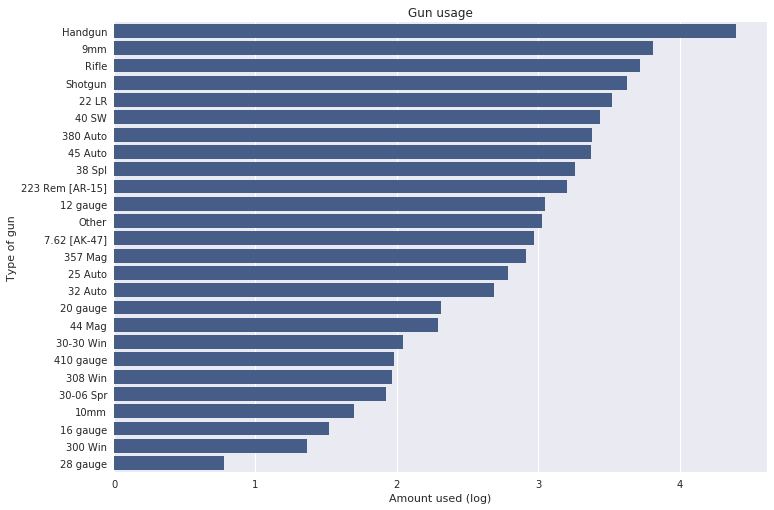

In [8]:
import seaborn as sns
import math
import matplotlib.pyplot as plt

# plot the data
sns.set(rc={'figure.figsize':(11.7,8.27)})

df_data = pd.DataFrame(data).sort_values('Guns used', ascending=False)
fig = sns.barplot(x='Guns used', y=df_data.index, data=df_data, label='Guns used', color=sns.xkcd_rgb["denim blue"])
plt.xlabel("Amount used (log)")
plt.ylabel("Type of gun")
plt.title("Gun usage")
plt.show(fig)

In [55]:
data = pd.read_csv("../datasets/data_clean.csv")

years = ['2014','2015','2016','2017']
ar_15 = {}

print(data["date"][142342])

for i in range(len(data)):
    item = data["gun_type"][i]
    item = re.split("[|]+", item)
    # iterate over new elements
    for element in item:
        # remove number and : from element
        element = element.split(':')[-1]
        if element == "223 Rem [AR-15]":
            if data["date"][i][:4] in ar_15:
                ar_15[data["date"][i][:4]] += 1
            else:
                ar_15[data["date"][i][:4]] = 1
            
print(ar_15)

2016-08-24
{'2014': 50, '2015': 319, '2016': 451, '2017': 541, '2018': 249}


In [56]:
labels = []
values = []

for item in ar_15:
    labels.append(item)
    values.append(ar_15[item])

In [57]:
from bokeh.io import show
from bokeh.plotting import figure, output_notebook
import math

output_notebook()

p = figure(x_range=labels, plot_height=500, title='Use of AR-15 over the years')
p.vbar(x=labels, top=values, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Amount used"

show(p)

Loading BokehJS ...

In [58]:
data = pd.read_csv("../datasets/data_clean.csv")

incidents = {}

for i in range(len(data)):
    item = data["gun_type"][i]
    item = re.split("[|]+", item)
    # iterate over new elements
    for element in item:
        # remove number and : from element
        element = element.split(':')[-1]
        if element != "Unknown":
            if data["date"][i][:4] in incidents:
                incidents[data["date"][i][:4]] += 1
            else:
                incidents[data["date"][i][:4]] = 1
                
print(incidents)

{'2014': 2217, '2015': 17221, '2016': 19445, '2017': 18259, '2018': 4084}


In [59]:
values_2 = []

for item in incidents:
    values_2.append(incidents[item])
    
values_3 = []
for i in range(len(values)):
    values_3.append(values[i]/values_2[i])
    
print(values_3)

[0.02255299954894001, 0.01852389524417862, 0.023193623039341735, 0.029629223944356207, 0.06096963761018609]


In [60]:
from bokeh.io import show
from bokeh.plotting import figure, output_notebook
import math

output_notebook()

p = figure(x_range=labels, plot_height=500, title='Times AR-15 used per recorded incident per year')
p.vbar(x=labels, top=values_3, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Amount used per recorded incident"

show(p)

Loading BokehJS ...